<a href="https://colab.research.google.com/github/majiy4/PCD-MaziyatulHikmah/blob/soal-2/PCD-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rata-rata piksel:
Original : 103.65021604938272
LPF      : 103.63
HPF      : 33.04379629629629
BPF      : 104.86487654320987


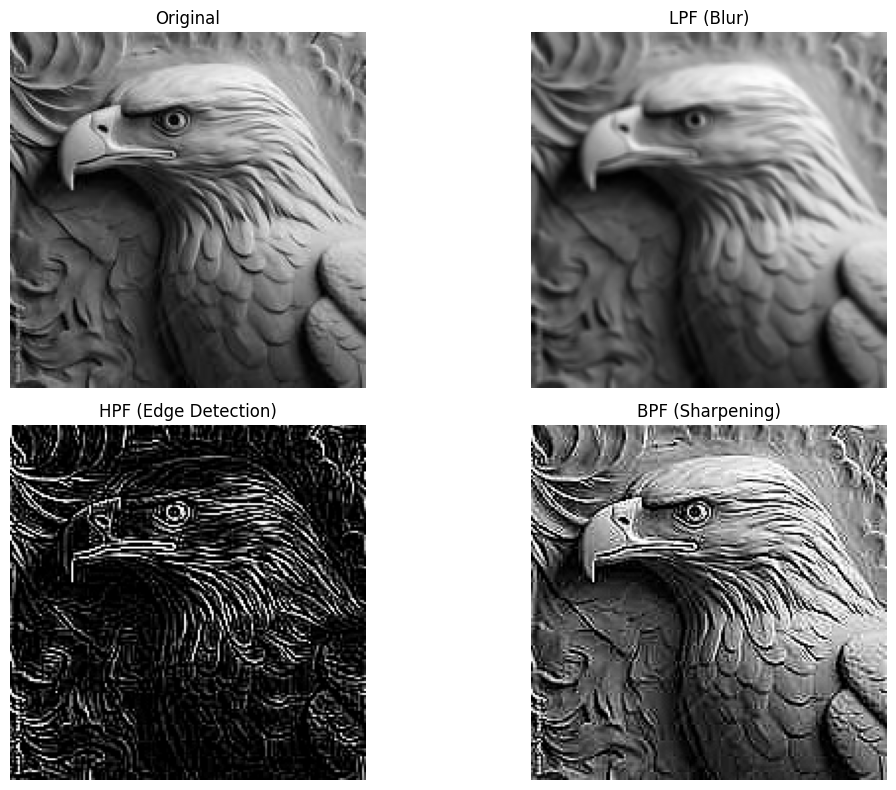

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Load citra grayscale ===
img = cv2.imread('uts.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Gambar tidak ditemukan. Upload dulu file uts.jpeg ke Colab!")

# === 2. Definisi Kernel ===
LPF = (1/9) * np.array([[1,1,1],
                        [1,1,1],
                        [1,1,1]])

HPF = np.array([[-1,-1,-1],
                [-1, 8,-1],
                [-1,-1,-1]])

BPF = np.array([[ 0,-1, 0],
                [-1, 5,-1],
                [ 0,-1, 0]])

# === 3. Konvolusi (Filter2D) ===
img_lpf = cv2.filter2D(img, -1, LPF)
img_hpf = cv2.filter2D(img, -1, HPF)
img_bpf = cv2.filter2D(img, -1, BPF)

# === 4. Hitung rata-rata piksel ===
mean_original = np.mean(img)
mean_lpf = np.mean(img_lpf)
mean_hpf = np.mean(img_hpf)
mean_bpf = np.mean(img_bpf)

print("Rata-rata piksel:")
print("Original :", mean_original)
print("LPF      :", mean_lpf)
print("HPF      :", mean_hpf)
print("BPF      :", mean_bpf)

# === 5. Tampilkan hasil ===
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img_lpf, cmap='gray')
plt.title("LPF (Blur)")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(img_hpf, cmap='gray')
plt.title("HPF (Edge Detection)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img_bpf, cmap='gray')
plt.title("BPF (Sharpening)")
plt.axis('off')

plt.tight_layout()
plt.show()
